# UNIVERSIDAD DE LIMA

## OBTENIENDO LOS ENLACES A LAS TESIS

In [ ]:
uni = "Universidad de Lima" # Nombre de la universidad
# Esta página contiene los enlaces a las distintas tesis
link = "https://repositorio.ulima.edu.pe/discover?rpp=10&etal=0&scope=20.500.12724/1409&group_by=none&page=1" 

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
rpt = requests.get(link)

In [ ]:
soup = BeautifulSoup(rpt.text, "html.parser")

In [ ]:
tesis = soup.find_all(class_="row ds-artifact-item ")

In [ ]:
lista_tesis = []
for div in tesis:
  #Obtenemos los enlaces y les agregamos el dominio para tener el enalce completo
  lista_tesis.append("https://repositorio.ulima.edu.pe/"+f"{div.find('a').get('href')}")

In [ ]:
lista_tesis

['https://repositorio.ulima.edu.pe//handle/20.500.12724/16321',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/16334',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15986',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/16306',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/16267',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15791',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15631',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15579',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15610',
 'https://repositorio.ulima.edu.pe//handle/20.500.12724/15636']

## OBTENIENDO LA INFORMACIÓN DE UNA TESIS

In [ ]:
link_tesis = "https://repositorio.ulima.edu.pe//handle/20.500.12724/16321"
resp_t = requests.get(link_tesis)
soup_t = BeautifulSoup(resp_t.text, "html.parser")

In [ ]:
#Obteniendo el título
soup_t.find("h2").text

'Reestructuración del desembarcadero pesquero artesanal de Ilo'

In [ ]:
#Nombre del tesista
a = soup_t.find_all(class_ = "simple-item-view-authors")[0].find_all("div")
for autor in a:
  print(autor.text.strip("\n"))

Cruz Falcon, Paul
Maldonado Fuentes, Maria Angela


In [ ]:
#Grado
import re
grado = soup_t.find_all(class_="simple-item-view-uri")[1].text
grado_f = re.findall('\[.*\]', grado)[0].strip("[").strip("]")
print(grado_f)

Trabajo de suficiencia profesional para optar el Título Profesional de Arquitecto, Universidad de Lima


In [ ]:
#Nombre del asesor(es)
b = soup_t.find_all(class_ = "simple-item-view-authors")[1].find_all("div")
for autor in b:
  print(autor.text.strip("\n"))

Takano Valdivia, Karen


In [ ]:
#Año
str(soup_t.find(class_="simple-item-view-date").find_all(text=True, recursive=False)[1])

'2022'

In [ ]:
#Resumen
str(soup_t.find(class_ = "simple-item-view-description").find("div").find_all(text=True, recursive=False)[0])

'Actualmente, la infraestructura pesquera artesanal en el país ignora toda relación con el entorno urbano en el que se emplaza. La investigación surge a partir de esta problemática además del cumplimiento de la Norma Sanitaria n°040, la cual estipula lineamientos para una mejor calidad del producto pesquero. Tras la revisión de los DPA’s (Desembarcaderos pesqueros artesanales) actualmente en ejecución/remodelación, se encuentra al DPA de Ilo como el más crítico ya que no cuenta con un área de expansión, posee una infraestructura deficiente y se encuentra en contacto directo con el casco urbano antiguo de la ciudad, desarrollando un importante desafío: la convivencia entre el programa funcional del DPA (flujos productivos pesqueros) y el desarrollo de actividades públicas en un mismo espacio. Con la intención de abrir el puerto hacia la ciudad, sin alterar los flujos productivos pesqueros, surge la idea de continuar recorridos públicos como los que se llevan a cabo en el malecón costero

In [ ]:
# Categoría/Subcategoría
cat = soup_t.find_all(class_="simple-item-view-uri")[3].find("span").text
cat

'Arquitectura / Urbanismo'

## OBTENIENDO LA IFORMACIÓN DE TODAS LAS TESIS

In [ ]:
n = 1 #Número de páginas a scrapear 
lista_tesis = [] #Aquí guardamos los enlaces de las tesis que tenemos 
for i in range(1,n+1):
  url = f"https://repositorio.ulima.edu.pe/discover?rpp=10&etal=0&scope=20.500.12724/1409&group_by=none&page={i}" 
  resp = requests.get(url)
  soup = BeautifulSoup(resp.text, "html.parser")
  tesis = soup.find_all(class_="row ds-artifact-item ")
  for div in tesis:
    #Completamos el enlace de cada tesis
    lista_tesis.append("https://repositorio.ulima.edu.pe/"+f"{div.find('a').get('href')}")

In [ ]:
len(lista_tesis) #Comprobamos cuantos enlaces obtuvimos

10

In [ ]:
#Módulos a utilizar
import csv
import re

In [ ]:
# Escribimos primero el Head del data frame 
with open("Tesis.csv", "w") as csv_file:
    escritor = csv.writer(csv_file, delimiter=",")
    escritor.writerow(["Institución","Título","Autor", "Grado", "Asesor(es)", "Año", "Resumen", "Categoría"]) 

# Por cada tesis obtenida, procedemos a buscar la información requerida.
for i in lista_tesis:
  resp_t = requests.get(i)
  soup_t = BeautifulSoup(resp_t.text, "html.parser") #Hacemos la sopa

  #Título
  try:
    titulo = soup_t.find("h2").text # los h2 son los títulos de cada tesis
  except: 
    titulo = "" #En caso no encontrar o dar error, definimos que sea un texto vacío.

  #Autor
  try:
    autor_m = [] #Creamos una lista para guardar los múltiples autores, en caso hallan míltiples autores
    a = soup_t.find_all(class_ = "simple-item-view-authors")[0].find_all("div")
    # Eliminamos los saltos de línea de cada autor, para tener los datos mas "limpios"
    for autor in a:
      autor_m.append(autor.text.strip("\n"))

    #Una vez teniendo la lista de los autores, procedemos a convertirno en una cadea de texto separado por coma
    autor_f = ", ".join(autor_m)
  except: 
    autor_f = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Grado
  try:
    grado_m = soup_t.find_all(class_="simple-item-view-uri")[1].text
    #Al obtner los grados, seleccionamos solo el fragmento de texto que nos interesa utilizando REGEX
    grado = re.findall('\[.*\]', grado_m)[0].strip("[").strip("]")
  except: 
    grado = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Nombre del asesor(es)
  try:
    asesor = [] #Creamos una lista para guardar los múltiples asesores, en caso hallan míltiples asesores
    b = soup_t.find_all(class_ = "simple-item-view-authors")[1].find_all("div")
    for autor in b:
      # Eliminamos los saltos de línea de cada autor, para tener los datos mas "limpios"
      asesor.append(autor.text.strip("\n"))

    #Una vez teniendo la lista de los autores, procedemos a convertirno en una cadea de texto separado por coma
    asesor_f = ", ".join(asesor)
  except:
    asesor_f = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Año
  try:
    #Entre dos textos dentro del mismo elemento HTML seleccionamos el segundo:
    año = str(soup_t.find(class_="simple-item-view-date").find_all(text=True, recursive=False)[1])
  except:
    año = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Resumen
  try:
     #Entre dos textos dentro del mismo elemento HTML seleccionamos el segundo:
    resumen = str(soup_t.find(class_ = "simple-item-view-description").find("div").find_all(text=True, recursive=False)[0])
  except:
    resumen = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Categoría
  try:
    # Obtenemos la categoría buscando por clcase
    cat = soup_t.find_all(class_="simple-item-view-uri")[3].find("span").text
  except:
    cat = "" #En caso ocurra un error, que lo defina como un texto vacío.

  #Colocamos todos los datos obtenidos en una lista la cual escribimos en el archivo csv
  x = ["Universidad de Lima", titulo, autor_f, grado, asesor_f, año, resumen, cat]
  with open("Tesis.csv", "a") as csv_file:
    escritor = csv.writer(csv_file, delimiter=",")
    escritor.writerow(x)
    
  #Y de esta forma, para cada uno de los enlaces de las tesis.

## VISUALIZANDO

In [1]:
#Importamos pandas para leer el arhivo
import pandas as pd

In [3]:
pd = pd.read_csv("Tesis_Universidad_de_Lima.csv") #Leemos las tesis usando pandas
pd.head() #Visualizamos los primeros 5 tesis

,Institución,Título,Autor,Grado,Asesor(es),Año,Resumen,Categoría
0,Universidad de Lima,Reestructuración del desembarcadero pesquero a...,"Cruz Falcon, Paul, Maldonado Fuentes, Maria An...",Trabajo de suficiencia profesional para optar ...,"Takano Valdivia, Karen",2022,"Actualmente, la infraestructura pesquera artes...",Arquitectura / Urbanismo
1,Universidad de Lima,Recursos personales y resiliencia en adolescen...,"Diaz Sono, Valeria, Zagal Mendoza, Fiorella",Tesis para optar el Título Profesional de Lice...,"Lindo Bárcena, Paola",2022,El presente estudio tiene como objetivos gener...,Psicología / Psicología social
2,Universidad de Lima,Hogar integral multidisciplinario para el adul...,"De La Flor Llona, Sara",Trabajo de suficiencia profesional para optar ...,"More Gómez, Valerie",2022,Esta investigación se basa en entender la situ...,Arquitectura / Proyectos arquitectónicos
3,Universidad de Lima,Estudio de prefactibilidad para la instalación...,"Contreras Flores, Fernando Samir",Tesis para optar el Título Profesional de Inge...,"Bonilla Pastor de Céspedes, Elsie",2022,The main objective of the project is to determ...,Ingeniería industrial / Producción
4,Universidad de Lima,Implementación de un sistema ERP en la empresa...,"Sinforoso Loayza, Manuel Francisco",Trabajo de suficiencia profesional para optar ...,"Ahoki Pajuelo, Carlos Augusto",2022,En el presente trabajo se detalla la mejora qu...,Ingeniería industrial / Tecnología de procesos


---

In [31]:
#Filtramos las tesis relacionadas con la carrera de estadística informática
df_est = pd.loc[pd.Categoría.str.contains("sistemas", na=False, case = False)]
df_est

,Institución,Título,Autor,Grado,Asesor(es),Año,Resumen,Categoría
31,Universidad de Lima,Desarrollo profesional hacia el dominio de los...,"Chavez Rivas, Luis Fernando",Trabajo de suficiencia profesional para optar ...,"Lewis Fuentes, Winston",2022,El presente Informe por Suficiencia Profesiona...,Ingeniería de sistemas / Sistemas de información
41,Universidad de Lima,Optimización del proceso de check in en hotele...,"Menchola Tenorio, Renzo",Trabajo de suficiencia profesional para optar ...,"Diez Quiñones Panduro, Percy",2022,"La pandemia que azota al mundo, y de manera pa...",Ingeniería de sistemas / Sistemas de información
228,Universidad de Lima,Marketplace colaborativo de venta de repuestos...,"Rosario Palacios, Eduardo Carlo",Trabajo de suficiencia profesional para optar ...,"Saravia Torres, Pedro Humberto",2022,Lima Metropolitana experimenta una constante c...,Ingeniería de sistemas / Software
237,Universidad de Lima,Sistema de gestión del consumo en tiempo real ...,"Llamas Fernandez, Juan Pablo",Trabajo de suficiencia profesional para optar ...,"Caballero Ortiz, José Alberto",2022,"Desde el inventó de la cocina en el siglo XIX,...",Ingeniería de sistemas / Sistemas de información
259,Universidad de Lima,Integración del perfil de tecnologías de la in...,"Lescano Uriol, Ubaldo Martín",Trabajo de suficiencia profesional para optar ...,"Aliaga Vílchez, Tobías",2022,Un ingeniero de sistemas egresado de la Univer...,Ingeniería de sistemas / Sistemas de información
267,Universidad de Lima,Dominio de la gestión de proyectos de TI,"Salazar Villafuerte, Noemi Yolanda",Trabajo de suficiencia profesional para optar ...,"Lewis Fuentes, Winston",2022,El presente trabajo tiene por objetivo resalta...,Ingeniería de sistemas / Diseño y métodos
312,Universidad de Lima,Logística y procesos logísticos en el sector b...,"Calero Carpio, Carlos Daniel",Trabajo de suficiencia profesional para optar ...,"Zevallos Luna Victoria, Guillermo",2022,El egresado de la Carrera de Ingeniería de Sis...,Ingeniería de sistemas / Diseño y métodos
328,Universidad de Lima,Solución de gestión de bodegas en Lima Metropo...,"Saravia Fernandez, Yuri Absalon, Torres Lopez,...",Trabajo de suficiencia profesional para optar ...,"Zevallos Luna Victoria, Guillermo",2022,"En Lima Metropolitana existen 113,000 bodegas,...",Ingeniería de sistemas / Software
342,Universidad de Lima,Predicción de la demanda de pasajeros a clúste...,"Roque Rojas, Edwin",Tesis para optar el Título Profesional de Inge...,"Cárdenas Garro, José Antonio",2022,El nivel de demanda de pasajeros del servicio ...,Ingeniería de sistemas / Diseño y métodos
344,Universidad de Lima,Informe de suficiencia profesional aplicada a ...,"Nakashima Burmester, Julio Tomas",Trabajo de suficiencia profesional para optar ...,"Cárdenas Garro, José Antonio",2022,Un ingeniero de sistemas egresado de la Univer...,Ingeniería de sistemas / Sistemas de información


In [116]:
#Agrupamos por año para conocer cuantas tesis por año se publicaron
a = df_est[["Título","Año"]].groupby(["Año"]).count() 
a

,Título
Año,
2019,3
2020,22
2021,16
2022,11


In [60]:
import matplotlib.pyplot as plt #Importamos

In [61]:
a["Título"].tolist() #Probamos obtener una lista  de valores para un posible gráfico

[3, 22, 16, 11]

### Año

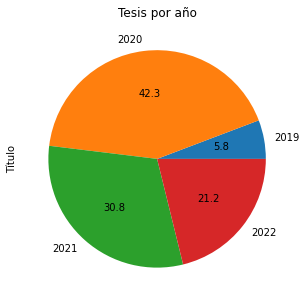

In [118]:
#Gráfica de pie de la cantidad de tesis por año
plot = a['Título'].plot(kind='pie', autopct='%.1f', #Gráfica de tipo pie, mostramos los valores en procentajes
                                    figsize=(5, 5), #El tamaño de la imagen, es de 5x5
                                    title='Tesis por año - Universidad de Lima') #Título del gráfico

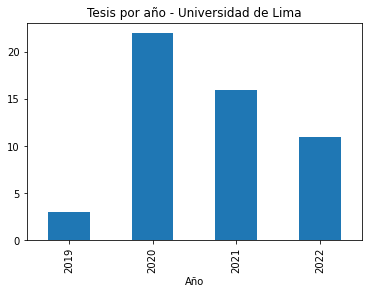

In [73]:
#Gráfica de barras de la cantidad de tesis por año
plot = a['Título'].plot(kind='bar', #Gráfico de barras
                        title='Tesis por año - Universidad de Lima') #Título del gráfico

In [94]:
#Resumen de algunos datos sobre la variable año
a.describe()

,Título
count,4.000000
mean,13.000000
std,8.041559
min,3.000000
25%,9.000000
50%,13.500000
75%,17.500000
max,22.000000


In [104]:
#Podemos observar que fué 3 la mínima cantidad de tesis publicada durante estos años
#En promedio se publican 13 tesis por año

## Extras:

In [ ]:
# Tuve un error al obtener los autores, ya que en algunas tesis eran varios
# Hice pruebas para lograr obtener todas.

#Probando el código para obtener el autor en otras tesis:
resp_t = requests.get("https://repositorio.ulima.edu.pe//handle/20.500.12724/16321")
soup_t = BeautifulSoup(resp_t.text, "html.parser")
autor_m = []
a = soup_t.find_all(class_ = "simple-item-view-authors")[0].find_all("div")
for autor in a:
  autor_m.append(autor.text.strip("\n"))

autor_m

['Cruz Falcon, Paul', 'Maldonado Fuentes, Maria Angela']